# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Nicer plots
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Challenge 1: Manipulate regression slopes
1. Write a function that builds and trains the model (in data | out final predictions and losses).
2. Write a function that create the data and outputs x, y. y = m*x + rand/2. N=50
3. In a parametric experiment, vary the slope (m) between [-2, +2], in 21 steps. Repeat the entire experiment 50 times.
4. Plot the loss and accuracy as a function of the slope (slope x-axis).

In [16]:
def generate_data(slope: float, N: int=50) -> (torch.tensor, torch.tensor):
    x = torch.randn(N,1)
    y = slope*x + torch.randn(N,1)/2
    return x, y

In [108]:
def train_nn(x, y) -> (torch.tensor, torch.tensor):
    # build model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.ReLU(),       # activation function
        nn.Linear(1,1)   # output layer
    )

    # learning rate
    learningRate = .05

    # loss function
    lossfun = nn.MSELoss()

    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

    numepochs = 500
    losses = torch.zeros(numepochs)

    ## Train the model!
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # manually compute losses
    # final forward pass
    predictions = ANNreg(x)

    # final loss (MSE)
    # testloss = (predictions-y).pow(2).mean()

    return predictions, losses[-1]

# Run the experiment

In [109]:
slope_steps = 21
slopes = np.linspace(-2, 2, slope_steps)
repeats = 50
N = 50

all_losses = np.zeros((slope_steps, repeats))
all_accuracies = np.zeros((slope_steps, repeats))
for i_sl, slope in enumerate(slopes):
    print(f"Slope {slope}")

    for rep in range(repeats):
        x, y = generate_data(slope, N=N)

        predictions, loss = train_nn(x, y)

        all_losses[i_sl, rep] = loss.item()

        predictions = predictions.detach().numpy().flatten()

        # If the prediction is a flat line, then the correlation will return nan (standard deviation is 0 -> divide by 0)
        # So make sure that we don't blow up
        if np.unique(predictions).size > 1:
            all_accuracies[i_sl, rep] = np.corrcoef(y.T, predictions)[0,1]
        else:
            all_accuracies[i_sl, rep] = 0

# Average the results
avg_losses = all_losses.mean(axis=1)
avg_accuracies = all_accuracies.mean(axis=1)

Slope -2.0
Slope -1.8
Slope -1.6
Slope -1.4
Slope -1.2
Slope -1.0
Slope -0.7999999999999998
Slope -0.5999999999999999
Slope -0.3999999999999999
Slope -0.19999999999999996
Slope 0.0
Slope 0.20000000000000018
Slope 0.40000000000000036
Slope 0.6000000000000001
Slope 0.8000000000000003
Slope 1.0
Slope 1.2000000000000002
Slope 1.4000000000000004
Slope 1.6
Slope 1.8000000000000003
Slope 2.0


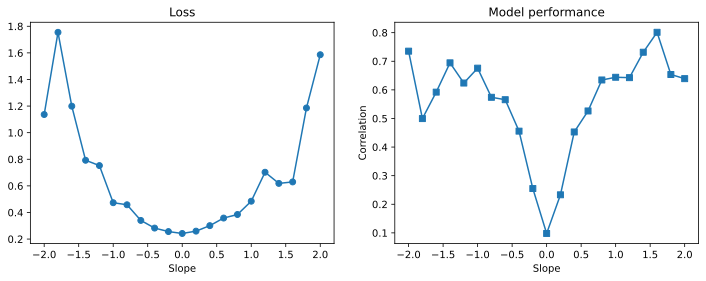

In [110]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title(f"Loss")
plt.plot(slopes, avg_losses, marker='o')
plt.xlabel("Slope")


plt.subplot(122)
plt.title(f"Model performance")
plt.plot(slopes, avg_accuracies, marker='s')
plt.xlabel("Slope")
plt.ylabel("Correlation")

plt.show()